In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

print("test")


test


In [2]:
targets = []
features = []

files = glob.glob("E:/MLdataset/train/*.jpg") # liste de tous les chemins des images
var = np.array(Image.open(files[0]).resize((75,75)))
print(var.shape)

for file in files[:100]:
    # resize l'image en 75x75 puis elle est transformer en array (75x75x3 pour le RGB)
    features.append(np.array(Image.open(file).resize((75,75)))) 
    target = [1, 0] if "cat" in file else [0, 1] #one hot encoding
    targets.append(target)


features = np.array(features)
targets = np.array(targets)

print("images",features.shape)
print("label",targets.shape)

(75, 75, 3)
images (100, 75, 75, 3)
label (100, 2)


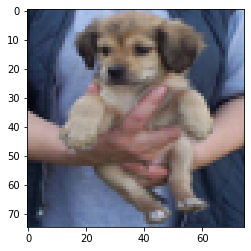

In [3]:
plt.imshow(features[0])

In [4]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.1, random_state=42)

x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train shape : ", x_train.shape)

x_train shape :  (90, 75, 75, 3)


In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import StandardScaler




model = Sequential()
model.add(Conv2D(input_shape=(75,75,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)


Train on 90 samples, validate on 10 samples
Epoch 1/10
90/90 [==============================] - 28s 308ms/sample - loss: 0.6932 - accuracy: 0.4556 - val_loss: 0.7311 - val_accuracy: 0.5000
Epoch 2/10
90/90 [==============================] - 25s 279ms/sample - loss: 0.7080 - accuracy: 0.5444 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
90/90 [==============================] - 24s 271ms/sample - loss: 0.6937 - accuracy: 0.4556 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
90/90 [==============================] - 26s 287ms/sample - loss: 0.6929 - accuracy: 0.5444 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
90/90 [==============================] - 23s 255ms/sample


KeyboardInterrupt: 

In [3]:
import tensorflow as tf
 
#print(tf.test.is_gpu_available())


ImportError: cannot import name 'abs'